# Topic 2: Basic Graphs

Now that you understand the fundamentals, let's build more sophisticated graphs with multiple nodes and complex state management.

## Learning Objectives

- Create graphs with multiple nodes
- Manage state transformations
- Build linear workflows
- Pass data between nodes effectively

In [16]:
# Setup
import os
import getpass
from typing import TypedDict, Annotated
from langgraph.graph import StateGraph, START, END
from langchain_anthropic import ChatAnthropic
from langchain_core.messages import HumanMessage, SystemMessage

if "ANTHROPIC_API_KEY" not in os.environ:
    os.environ["ANTHROPIC_API_KEY"] = getpass.getpass("Enter your Anthropic API key: ")

model = ChatAnthropic(model="claude-sonnet-4-20250514")
print("✓ Setup complete!")

✓ Setup complete!


## Example: Content Creation Pipeline

Let's build a multi-step content creation workflow that:
1. Generates a topic outline
2. Writes content based on the outline
3. Reviews and improves the content

In [17]:
# Define our state with more fields
class ContentState(TypedDict):
    topic: str
    outline: str
    content: str
    review: str
    final_content: str

print("✓ ContentState defined")

✓ ContentState defined


## Creating Multiple Nodes

Each node performs a specific task in our pipeline:

In [18]:
def generate_outline(state: ContentState) -> ContentState:
    """Generate an outline for the topic."""
    print("📝 Generating outline...")
    
    prompt = f"""Create a detailed outline for a blog post about: {state['topic']}
    
    Include:
    - 3-4 main sections
    - Key points for each section
    - Estimated word count for each section
    
    Keep it concise but comprehensive."""
    
    response = model.invoke([HumanMessage(content=prompt)])
    
    return {
        "topic": state["topic"],
        "outline": response.content,
        "content": "",
        "review": "",
        "final_content": ""
    }

def write_content(state: ContentState) -> ContentState:
    """Write content based on the outline."""
    print("✍️  Writing content...")
    
    prompt = f"""Based on this outline, write a blog post:
    
    OUTLINE:
    {state['outline']}
    
    Write engaging, informative content. Keep it around 300-400 words."""
    
    response = model.invoke([HumanMessage(content=prompt)])
    
    return {
        "content": response.content
    }

def review_content(state: ContentState) -> ContentState:
    """Review and suggest improvements."""
    print("🔍 Reviewing content...")
    
    prompt = f"""Review this content and provide specific suggestions for improvement:
    
    CONTENT:
    {state['content']}
    
    Focus on:
    - Clarity and flow
    - Engagement
    - Completeness
    
    Be specific and actionable."""
    
    response = model.invoke([HumanMessage(content=prompt)])
    
    return {
        "review": response.content
    }

def finalize_content(state: ContentState) -> ContentState:
    """Apply review suggestions to create final version."""
    print("✨ Finalizing content...")
    
    prompt = f"""Based on this review, improve the content:
    
    ORIGINAL CONTENT:
    {state['content']}
    
    REVIEW:
    {state['review']}
    
    Provide the improved version."""
    
    response = model.invoke([HumanMessage(content=prompt)])
    
    return {
        "final_content": response.content
    }

print("✓ All nodes created!")

✓ All nodes created!


## Building the Graph

Now let's connect our nodes in a linear workflow:

In [19]:
# Create the graph
graph_builder = StateGraph(ContentState)

# Add all nodes
graph_builder.add_node("generate_outline", generate_outline)
graph_builder.add_node("write_content", write_content)
graph_builder.add_node("review_content", review_content)
graph_builder.add_node("finalize_content", finalize_content)

# Add edges to create the flow
graph_builder.add_edge(START, "generate_outline")
graph_builder.add_edge("generate_outline", "write_content")
graph_builder.add_edge("write_content", "review_content")
graph_builder.add_edge("review_content", "finalize_content")
graph_builder.add_edge("finalize_content", END)

# Compile
content_graph = graph_builder.compile()

print("✓ Content creation graph compiled!")

✓ Content creation graph compiled!


## Visualize the Graph

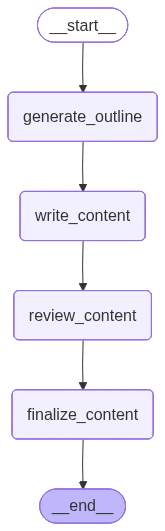

In [20]:
from IPython.display import Image, display

try:
    display(Image(content_graph.get_graph().draw_mermaid_png()))
except Exception:
    print("Graph structure:")
    print("START -> generate_outline -> write_content -> review_content -> finalize_content -> END")

## Run the Pipeline

Let's test our content creation pipeline:

In [21]:
# Run the graph
result = content_graph.invoke({
    "topic": "How to Get Started with LangGraph",
    "outline": "",
    "content": "",
    "review": "",
    "final_content": ""
})

print("\n" + "="*50)
print("PIPELINE COMPLETE!")
print("="*50)

📝 Generating outline...
✍️  Writing content...
🔍 Reviewing content...
✨ Finalizing content...

PIPELINE COMPLETE!


In [22]:
# Display the outline
print("\n📝 OUTLINE:")
print("-" * 50)
print(result["outline"])


📝 OUTLINE:
--------------------------------------------------
# Blog Post Outline: How to Get Started with LangGraph

## Introduction (200-250 words)
- Brief explanation of what LangGraph is (LangChain's library for building stateful, multi-actor applications with LLMs)
- Why LangGraph matters: enables complex agent workflows, cyclical flows, and human-in-the-loop patterns
- What readers will learn from this guide
- Prerequisites: basic Python knowledge and familiarity with LLMs

## Section 1: Understanding LangGraph Fundamentals (400-500 words)
- **Core Concepts**
  - Graphs, nodes, and edges explained
  - State management and how it differs from traditional chains
  - Agent vs. tool nodes
- **Key Components**
  - StateGraph class and its role
  - Message passing between nodes
  - Conditional routing and decision points
- **Common Use Cases**
  - Multi-agent conversations
  - Complex reasoning workflows
  - Human oversight integration
  - Iterative problem-solving patterns

## Sectio

In [24]:
# Display the first draft
print("\n✍️  FIRST DRAFT:")
print("-" * 50)
print(result["content"])


✍️  FIRST DRAFT:
--------------------------------------------------
# How to Get Started with LangGraph: Building Stateful AI Applications Made Simple

If you've been working with large language models (LLMs), you've probably hit the limitations of simple, linear chains. What happens when you need your AI agents to collaborate, make decisions based on previous steps, or involve human oversight in complex workflows? Enter **LangGraph** – LangChain's powerful library designed specifically for building stateful, multi-actor applications with LLMs.

Unlike traditional chains that follow a predetermined path from input to output, LangGraph enables you to create sophisticated agent workflows with cyclical flows, conditional branching, and dynamic decision-making. Think of it as upgrading from a simple assembly line to an intelligent, adaptive network where AI agents can collaborate, iterate, and respond to changing conditions.

## Why LangGraph Matters

In today's AI landscape, the most val

In [25]:
# Display the review
print("\n🔍 REVIEW:")
print("-" * 50)
print(result["review"])


🔍 REVIEW:
--------------------------------------------------
# Content Review: LangGraph Tutorial

## Overall Assessment
This is a well-structured, comprehensive tutorial that effectively introduces LangGraph. The content flows logically and covers essential topics thoroughly. However, there are several areas where clarity, engagement, and completeness can be improved.

## Specific Improvement Suggestions

### 1. **Introduction & Hook Enhancement**

**Current Issue**: The opening paragraph is dense and somewhat abstract.

**Suggested Improvement**:
```markdown
# How to Get Started with LangGraph: Building Stateful AI Applications Made Simple

Have you ever built a chatbot that couldn't remember what it said two messages ago? Or created an AI workflow that got stuck because it couldn't handle unexpected responses? You're not alone.

Most AI applications today follow a simple pattern: input → process → output. But what if your AI needs to collaborate with other AI agents, remember previ

In [27]:
# Display the final content
print("\n✨ FINAL CONTENT:")
print("-" * 50)
print(result["final_content"])


✨ FINAL CONTENT:
--------------------------------------------------
# How to Get Started with LangGraph: Building Stateful AI Applications Made Simple

Have you ever built a chatbot that couldn't remember what it said two messages ago? Or created an AI workflow that got stuck because it couldn't handle unexpected responses? You're not alone.

Most AI applications today follow a simple pattern: input → process → output. But what if your AI needs to collaborate with other AI agents, remember previous decisions, or pause for human approval? That's where **LangGraph** comes in.

LangGraph is LangChain's breakthrough library for building AI applications that think, remember, and collaborate like human teams. Instead of simple, linear chains, you can create sophisticated workflows where multiple AI agents work together, maintain shared memory, and adapt to changing conditions in real-time.

## Before We Start: Quick Checklist

- [ ] Python 3.8+ installed
- [ ] Basic familiarity with Python 

## Understanding State Updates

Notice how each node receives the full state and returns partial updates. LangGraph merges these updates automatically.

## Exercise: Build Your Own Pipeline

Create a research pipeline that:
1. Takes a research question
2. Generates key research areas to explore
3. Creates a research plan
4. Summarizes potential findings

Use the pattern above as a template!

In [ ]:
# Your code here!

class ResearchState(TypedDict):
    question: str
    research_areas: str
    research_plan: str
    summary: str

# TODO: Define your nodes
# TODO: Build your graph
# TODO: Run it with a research question


## Key Takeaways

In this notebook, you learned:

1. ✅ How to create graphs with multiple nodes
2. ✅ Managing complex state with multiple fields
3. ✅ Building linear workflows where data flows through stages
4. ✅ How nodes update state through partial returns
5. ✅ Creating practical multi-step pipelines

## Next Steps

Continue to **Topic 3: Conditional Edges** to learn how to add decision-making to your graphs!